In [1]:
import matplotlib.pyplot as plt

In [36]:
DIR = "/home/kaustubh/My-Notes/random/"

f1 = "10000 1500 2"
f2 = "10000 400 2"
f3 = "1000 1000 2"

In [3]:
SAVE_PLOTS_LOCATION = "./plot_imgs/"
# Create folder to save plot images if not present already
import os

if not os.path.exists(SAVE_PLOTS_LOCATION):
    os.makedirs(SAVE_PLOTS_LOCATION)

In [18]:
# Parse f1
arr = []
def parse_file(file):
    f = open(file, "r")
    for x in f:
        splits = x.split(" : ")
        if(splits[0]=="NOW"):
            arr.append(int(splits[1]))

parse_file(DIR+f1)

# for x in arr:
#     print(x)


min_ = min(arr)
print(min_)

mx = 0
dic = {}
for i in range(256):
    tmp = 0
    for x in arr:
        if (x/1000 - min_/1000 <= i):
            tmp +=1
    dic[i] = tmp

# for x in dic:
#     print(x, dic[x])

# print(mx)

1593010061953


In [38]:
# Parse f2
arr2 = []
def parse_file2(file):
    f = open(file, "r")
    for x in f:
        splits = x.split(" : ")
        if(splits[0]=="DIFF"):
            tmp = splits[1].split('E')
            arr2.append(float(tmp[0])*10000000)
# #             if(tmp[1] != 7):
#             print(tmp[1])
parse_file2(DIR+f2)






min2_ = min(arr2)
print(min2_)

dic2 = {}
for i in range(256):
    tmp = 0
    for x in arr2:
        if (x/1000 - min2_/1000 <= i):
            tmp +=1
    dic2[i] = tmp

# for x in dic2:
#     print(x, dic2[x])

19013394.9576


In [51]:
# Parse f3
arr3 = []
def parse_file3(file):
    f = open(file, "r")
    for x in f:
        splits = x.split(" : ")
        if(splits[0]=="NOW"):
            arr3.append(int(splits[1]))

parse_file3(DIR+f3)

# for x in arr:
#     print(x)


min_3 = min(arr3)
print(min_3)

# mx = 0
dic3 = {}
for i in range(21):
    tmp = 0
    for x in arr3:
        if (x/1000 - min_3/1000 <= i):
            tmp += 1
    dic3[i] = tmp

# for x in dic:
#     print(x, dic[x])

# print(mx)

1593009945005


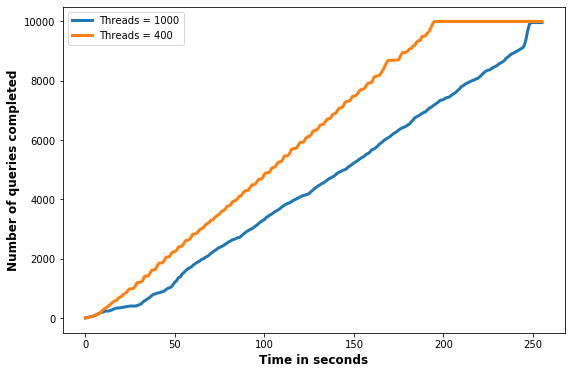

In [56]:
def plot_data():
    plt.figure(figsize=(9, 6))
    x_vals = []
    y_vals = []
    x_vals2 = []
    y_vals2 = []
    for x in dic:
        x_vals.append(x)
        y_vals.append(dic[x])
    
    for x in dic2:
        x_vals2.append(x)
        y_vals2.append(dic2[x])
        
    
    
    plt.plot(
        x_vals,
        y_vals,
#         linestyle=":",
        label="Threads = 1000",
#         c="black",
        linewidth=3,
    )
    plt.plot(
        x_vals2,
        y_vals2,
#         linestyle=":",
        label="Threads = 400",
#         c="black",
        linewidth=3,
    )
#     plt.plot(x_vals, round_trip_times, label="Avg. Round Trip Time Values", c="green")
    plt.ylabel("Number of queries completed",fontweight ='bold',fontsize=12)
#     plt.xlabel()
    plt.xlabel("Time in seconds",fontweight ='bold',fontsize=12);
    plt.legend()
    # save figure
    plt.savefig(SAVE_PLOTS_LOCATION + f1 + ".png")
    plt.show()
    
    
    
    
    
plot_data()

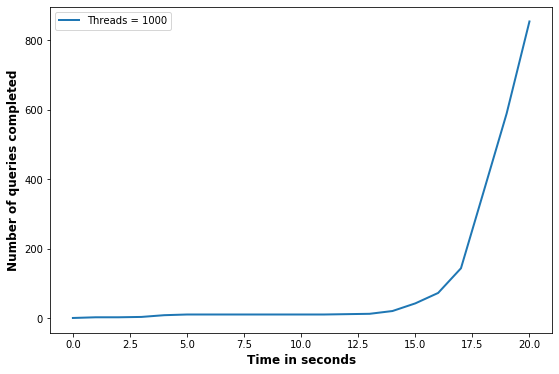

In [58]:
def plot_data3():
    plt.figure(figsize=(9, 6))

    x_vals3 = []
    y_vals3 = []
    
    for x in dic3:
        x_vals3.append(x)
        y_vals3.append(dic3[x])
    plt.plot(
        x_vals3,
        y_vals3,
#         linestyle=":",
        label="Threads = 1000",
#         c="black",
        linewidth=2,
    )
#     plt.plot(x_vals, round_trip_times, label="Avg. Round Trip Time Values", c="green")
    plt.ylabel("Number of queries completed",fontweight ='bold',fontsize=12)
#     plt.xlabel()
    plt.xlabel("Time in seconds",fontweight ='bold',fontsize=12);
    plt.legend()
    # save figure
    plt.savefig(SAVE_PLOTS_LOCATION + f3 + ".png")
    plt.show()
    
plot_data3()

['116.25ms\n', '4.44s\n', '973.09ms\n', '2.73s\n', '20.10s\n', '29.03s\n', '1.31m\n', '3.24m\n']
116.25ms

1
0.11625  

4.44s

3
4.44  

973.09ms

1
0.97309  

2.73s

3
2.73  

20.10s

3
20.1  

29.03s

3
29.03  

1.31m

2
78.60000000000001  

3.24m

2
194.4  

['673.86ms\n', '5.40s\n', '2.75s\n', '5.84s\n', '32.96s\n', '55.24s\n', '2.41m\n', '5.69m\n']
[0.11625, 4.44, 0.97309, 2.73, 20.1, 29.03, 78.60000000000001, 194.4]


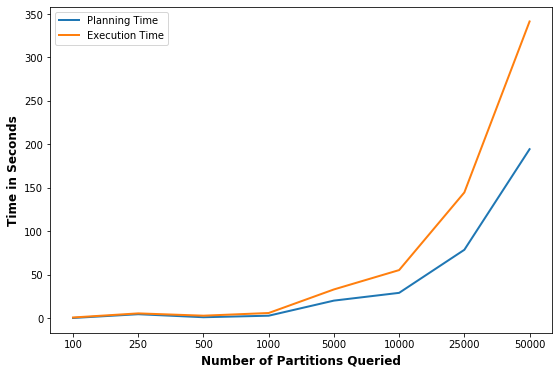

In [78]:
def plot_data4():
    plt.figure(figsize=(9, 6))

    x_vals = ['100','250','500','1000','5000','10000','25000','50000']
    pltime = []
    exec_tim = []

    def parse_file4(file):
        f = open(file, "r")
        for x in f:
            splits = x.split("	")
            if(splits[0]=="Planning Time"):
                pltime.append(splits[1])
            if(splits[0]=="Execution Time"):
                exec_tim.append(splits[1])

    parse_file4(DIR+"big data")

    print(pltime)
    
    for i in range(len(pltime)):
        print(pltime[i])
        if(pltime[i][len(pltime[i])-2] == 's' and pltime[i][len(pltime[i])-3] == 'm'):
            print(1)
            pltime[i] = float((pltime[i].split('ms'))[0])/1000
        
        elif(pltime[i][len(pltime[i])-2] == 'm'):
            print(2)
            pltime[i] = float((pltime[i].split('m'))[0])*60
        
        else:
            print(3)
            pltime[i] = float((pltime[i].split('s'))[0])
        print(pltime[i]," \n")

    print(exec_tim)
    for i in range(len(exec_tim)):
        if(exec_tim[i][len(exec_tim[i])-2] == 's' and exec_tim[i][len(exec_tim[i])-3] == 'm'):
            exec_tim[i] = float((exec_tim[i].split('ms'))[0])/1000
        
        elif(exec_tim[i][len(exec_tim[i])-2] == 'm'):
            exec_tim[i] = float((exec_tim[i].split('m'))[0])*60
        
        else:
            exec_tim[i] = float((exec_tim[i].split('s'))[0])

            
    
    print(pltime)

    plt.plot(
        x_vals,
        pltime,
#         linestyle=":",
        label="Planning Time",
#         c="black",
        linewidth=2,
    )
    
    plt.plot(
        x_vals,
        exec_tim,
#         linestyle=":",
        label="Execution Time",
#         c="black",
        linewidth=2,
    )
    
    
#     plt.plot(x_vals, round_trip_times, label="Avg. Round Trip Time Values", c="green")
    plt.ylabel("Time in Seconds",fontweight ='bold',fontsize=12)
#     plt.xlabel()
    plt.xlabel("Number of Partitions Queried",fontweight ='bold',fontsize=12);
    plt.legend()
    # save figure
    plt.savefig(SAVE_PLOTS_LOCATION + "big_data" + ".png")
    plt.show()
    
plot_data4()